In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load datasets
a = pd.read_csv('Answers_Processed.csv', low_memory=False)
q = pd.read_csv('Questions_Processed.csv', low_memory=False)

Questions: Title Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

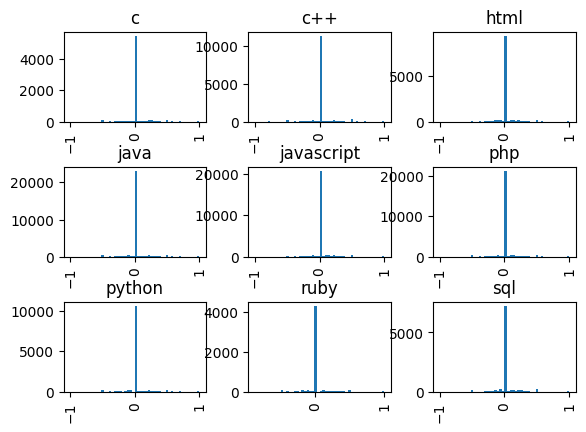

In [3]:
print("Questions: Title Sentiment by Language")
q["title_sentiment"].hist(by=q["Tag"], bins = 50)

Questions: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

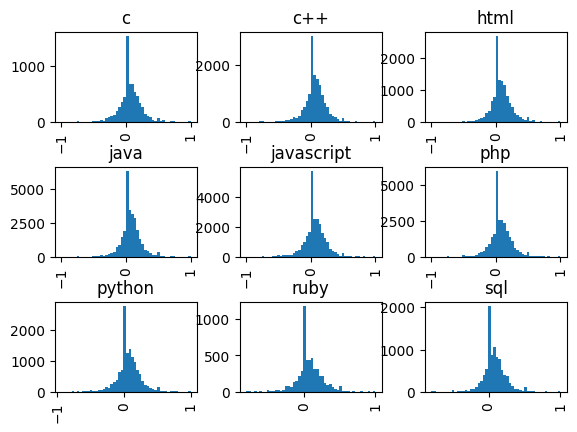

In [4]:
print("Questions: Body Sentiment by Language")
q["body_sentiment"].hist(by=q["Tag"], bins = 50)

Answers: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

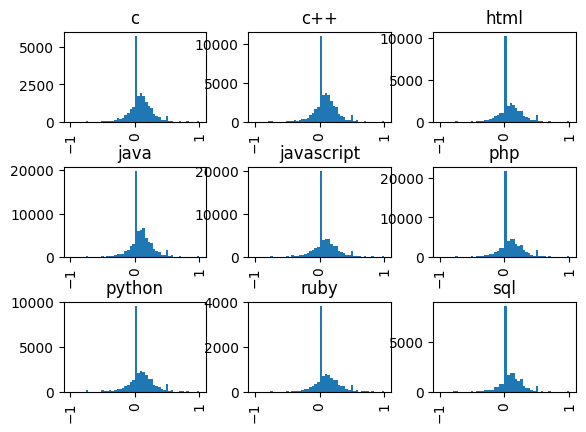

In [5]:
print("Answers: Body Sentiment by Language")
a["body_sentiment"].hist(by=a["Tag"], bins = 50)

We can see from the distribution of the sentiment analysis that the titles are almost entirely neutral. The sentiment of the body of the questions has a normal distribution for all the languages, with the vast majority of cases at or close to zero. There are slightly more cases above zero, so these would be categorized as 'neutral, leaning towards positive'. The body of the answers is similar, the vast majority are zero, with the rest following a normal distribution centered slightly above zero. This implies that the majority of answers can also be categorized as 'neutral' or 'neutral, leaning towards positive'. There are no great differences in the distribution of sentiment analysis between any of these languages. 